### MySQLdb 연동

In [1]:
import MySQLdb

In [3]:
#data_load
db = MySQLdb.connect(
    host="52.78.107.76",
    user="root",
    passwd="dss",
    db="book",
    charset="utf8")

db

<_mysql.connection open to '52.78.107.76' at 0000025D9DCBDF38>

### dataset 저장

In [ ]:
Query = """
   USE book

    alter table review
    default character set utf8 collate utf8_general_ci;
    
    LOAD DATA LOCAL INFILE "C:/Users/shine/Desktop/code/6. mysql/df_review.txt" 
    INTO TABLE review
    CHARACTER SET UTF8
    FIELDS TERMINATED BY ','
    ENCLOSED BY ""
    LINES TERMINATED BY '\n'(ID, ISBN, grade, review); 
"""

In [5]:
Query = """
    SHOW TABLES;
"""

In [6]:
curs = db.cursor()
curs.execute(Query)

3

In [10]:
Query = """
    Select *
    From book_info
"""

df_book_info = pd.read_sql(Query, db)
df_book_info.head()

,category,ranking,seogi_nl_clear,ISBN,title,author,publisher,price,width,length,thick,weight,page
0,0,0,0,ISBN,title,author,publisher,0,0,0,0,0,0
1,3,121,3810,9788937437496,인연,피천득,민음사,15000,122,191,17,262,300
2,5,148,13910,9791129706126,"""최태성 한국사능력검정시험: 심화(1",2,"3급)""",0,0,22000,188,257,19
3,5,143,3900,9788901240114,다시 쓰는 여성 세계사,매기 앤드루스,웅진지식하우스,19800,149,215,36,624,456
4,1,117,3810,9788956609959,종의 기원,정유정,은행나무,13000,150,210,30,519,384


In [14]:
Query = """
    Select *
    From review
"""

df_review = pd.read_sql(Query, db)
df_review.head()

,ID,ISBN,grade,review
0,ID,ISBN,0.0,review
1,ah**a0811,9791130627878,4.0,"""내가 원하는것을 모르고 살았던 것이 맞았다.\r"
2,그저 한줄기 빛을 보며 그것이 내가 원하는 것을\r,None,NaN,None
3,채워주는 줄,그렇게 살았는데 이 책,NaN,None
4,진정 나 자신이 무엇을 원하는지를 알게 되었다.\r,None,NaN,None


### book data, review data 를 book_concat View로 생성

In [15]:
Query = """
    CREATE VIEW book_concat as (
    SELECT book_info.*,avg_grade, review_cnt 
    FROM book_info
    JOIN (SELECT ISBN, round(AVG(grade)) AS avg_grade, COUNT(*) AS review_cnt
        FROM review
        WHERE ISBN IS NOT NULL
        AND grade IS NOT NULL
        AND grade != 0
        GROUP BY ISBN 
        HAVING avg_grade < 6) AS filter_review
ON book_info.ISBN = filter_review.ISBN
)
"""

In [16]:
Query = """
    Select *
    From book_concat 
"""

In [17]:
df_all = pd.read_sql(Query, db)
df_all

,category,ranking,seogi_nl_clear,ISBN,title,author,publisher,price,width,length,thick,weight,page,avg_grade,review_cnt
0,3,121,3810,9788937437496,인연,피천득,민음사,15000,122,191,17,262,300,4.0,1
1,5,148,13910,9791129706126,"""최태성 한국사능력검정시험: 심화(1",2,"3급)""",0,0,22000,188,257,19,3.0,2
2,5,143,3900,9788901240114,다시 쓰는 여성 세계사,매기 앤드루스,웅진지식하우스,19800,149,215,36,624,456,4.0,8
3,1,117,3810,9788956609959,종의 기원,정유정,은행나무,13000,150,210,30,519,384,4.0,17
4,1,143,3810,9788936477936,"""알로하","나의 엄마들""",이금이,0,14800,142,203,31,521,4.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502,21,46,3230,9788996767923,마지막 신호,David Cha,도서출판 KAM,12000,152,223,20,396,249,4.0,4
1503,21,49,3230,9788932816425,내면세계의 질서와 영적 성장,고든 맥도날드,IVP,15000,141,201,18,417,344,4.0,18
1504,21,40,3230,9788982641411,도올의 마가복음 강해,도올 김용옥,통나무,28000,179,248,48,1243,612,4.0,2
1505,21,48,3230,9788953135925,팀 켈러의 인생질문,팀 켈러,두란노서원,14000,141,207,20,348,272,4.0,10


In [176]:
Query = """
     Select publisher, count(title) as bestsellor_count
     From book_concat
     Group by publisher
     Order by bestsellor_count DESC
     Limit 1, 5
"""

In [177]:
df = pd.read_sql(Query, db)
df

,publisher,bestsellor_count
0,길벗,38
1,민음사,26
2,창비,25
3,문학동네,23
4,위즈덤하우스,21


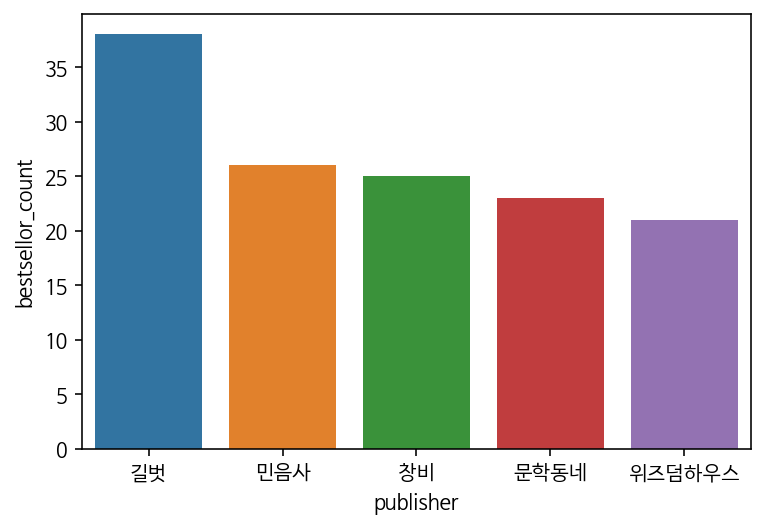

In [178]:
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
import matplotlib.pyplot as plt
# matplotlib 한글 사용을 위한 코드
import matplotlib as mpl
from matplotlib import rc
rc('font', family='AppleGothic')
mpl.rc('font', family='Hancom Gothic')
mpl.rc('axes', unicode_minus=False)


sns.barplot(x='publisher', y='bestsellor_count', data=df)

#### 베스트셀러에 가장 많이 진입한 출판사는 (EBS한국교육방송공사) > 길벗 > 민음사 > 창비 > 문학동네 > 위즈덤하우스

In [62]:
Query = """
    Select publisher, count(title) as count, sum(price*(150-ranking)) as leverage 
    From book_concat
    Group by publisher
    Having leverage > 0
    Order by leverage DESC
    Limit 5
"""

In [63]:
df = pd.read_sql(Query, db)
df

,publisher,count,leverage
0,길벗,38,78334500.0
1,한빛미디어,19,45496000.0
2,창비,25,34352700.0
3,에듀윌,18,32096000.0
4,알에이치코리아,18,26636900.0


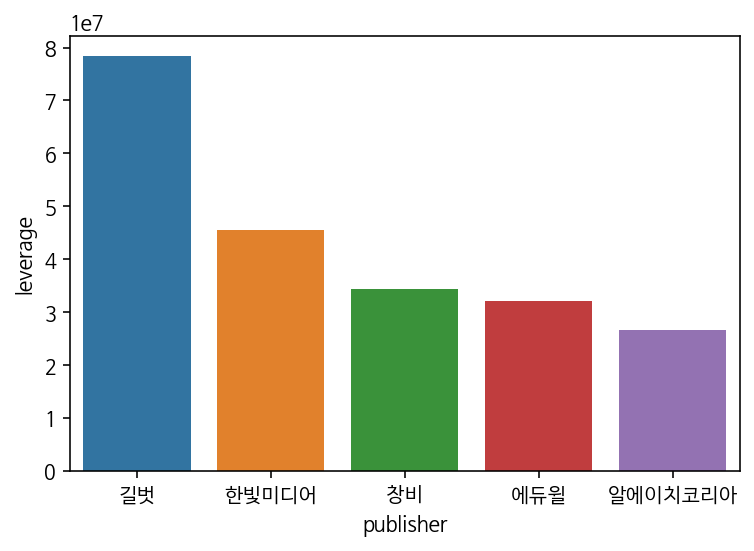

In [64]:
sns.barplot(x='publisher', y='leverage', data=df)

#### 가장 많은 판매수익을 얻은 출판사는 길벗 > 한빛미디어 > 창비 > 에듀윌 > 알에치코리아

In [232]:
Query = """
    Select ranking, ISBN, title, publisher, price, round(price/(length*thick*weight*page), 5) as paper_price
    From book_concat
    Order by paper_price DESC
    

"""

In [257]:
df = pd.read_sql(Query, db)
df = df[30:]
df

,ranking,ISBN,title,publisher,price,paper_price
30,133,9788988442265,천지팔양신주경,불교서원,3000,0.00049
31,39,9791196368395,에이든 전국 여행지도,타블라라사,21000,0.00047
32,143,9791157030460,English for Tourism,동양북스,13000,0.00045
33,122,9788903834014,엄지 피아노 칼림바 기초곡집,세광음악출판사,8000,0.00039
34,36,9788903411147,스즈키 바이올린 교본. 4,세광음악출판사,12000,0.00038
...,...,...,...,...,...,...
1502,111,9791196327989,민준호 사회 집요한 파이널(2020),호인북스,12000,NaN
1503,94,9788937504532,믿음의 기초,네비게이토,3000,NaN
1504,60,9788964430101,성막,기쁜소식사,13000,NaN
1505,57,9788985961073,반야심경 이야기,정토출판,7000,NaN


In [258]:
df.isnull().sum()

ranking          0
ISBN             0
title            0
publisher        0
price            0
paper_price    160
dtype: int64

In [259]:
df2 = df.dropna(axis=0)
df2

,ranking,ISBN,title,publisher,price,paper_price
30,133,9788988442265,천지팔양신주경,불교서원,3000,0.00049
31,39,9791196368395,에이든 전국 여행지도,타블라라사,21000,0.00047
32,143,9791157030460,English for Tourism,동양북스,13000,0.00045
33,122,9788903834014,엄지 피아노 칼림바 기초곡집,세광음악출판사,8000,0.00039
34,36,9788903411147,스즈키 바이올린 교본. 4,세광음악출판사,12000,0.00038
...,...,...,...,...,...,...
1342,79,9791136002525,공인중개사 1차 기본서 세트(2020),에듀윌,68000,0.00000
1343,94,9791164542000,무역영어 1급 이론+기출문제(2020),해커스금융,28800,0.00000
1344,78,9791125460510,9급 공무원 공통과목(국어·영어·한국사) 5개년 기출문제집(2020),시대고시기획,23000,0.00000
1345,40,9788982641411,도올의 마가복음 강해,통나무,28000,0.00000


In [260]:
df2.describe()

,ranking,price,paper_price
count,1317.000000,1317.000000,1317.000000
mean,72.249810,17223.082764,0.000024
std,41.008439,8669.509434,0.000039
min,1.000000,0.000000,0.000000
25%,37.000000,13800.000000,0.000010
50%,72.000000,16000.000000,0.000010
75%,106.000000,19000.000000,0.000030
max,150.000000,120000.000000,0.000490


In [261]:
# max, 이상치 삭제
df3 = df2[df2['paper_price'] != 0.347830]

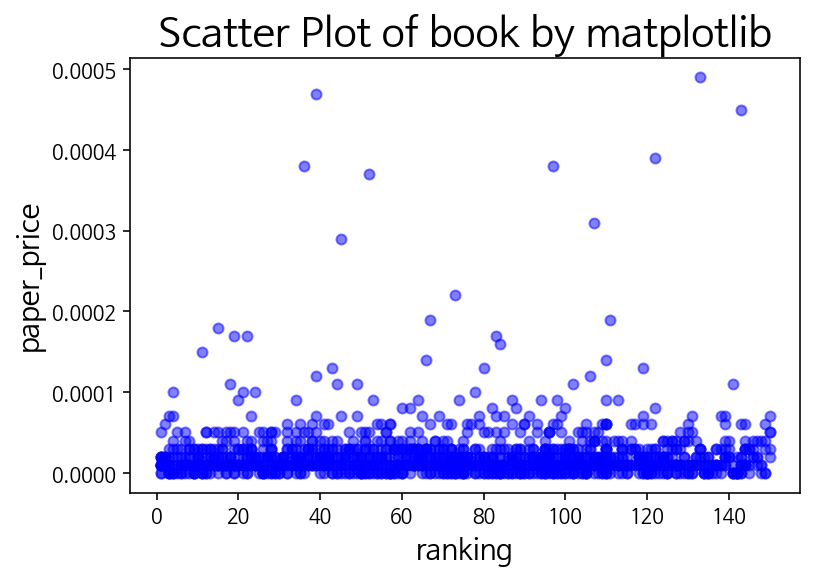

In [262]:
plt.plot('ranking', 'paper_price', data=df3, linestyle='none', marker='o', markersize=5, color='blue', alpha=0.5)
plt.title('Scatter Plot of book by matplotlib', fontsize=20)
plt.xlabel('ranking', fontsize=14)

plt.ylabel('paper_price', fontsize=14)

plt.show()